Methods I'll need: (cz = constrainedzoom)

cz/init.py -> contains the method constraint_vector, which I assume creates the modification...

or maybe the method add_constraint from the cz/methods/geometric.py

cz/methods/filtered -> FilteredZoomConstrained is the main genetIC algorithm

Pseudocode:

Generate realization of 1D field, plot it



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import constrainedzoom as cz
import numpy as np
import matplotlib.pyplot as plt

In [2]:
HIGH = 64
LOW = 32
SCALE = 2
OFFSET = 5
test = cz.methods.filtered.FilteredZoomConstrained(nP=HIGH, nW=LOW, hires_window_scale=SCALE, offset=OFFSET)

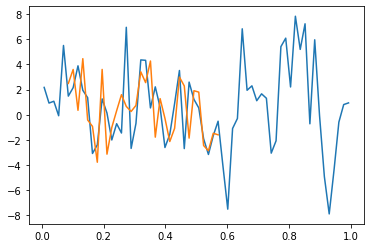

In [3]:
hi, lo = test.realization()
# realization creates random noise, but the results are AFTER the matter transfer function is applied.
pos = test.xs()
plt.plot(pos[0], hi)
plt.plot(pos[1], lo)

Text(0.5, 1.0, 'Unchanged White Noise')

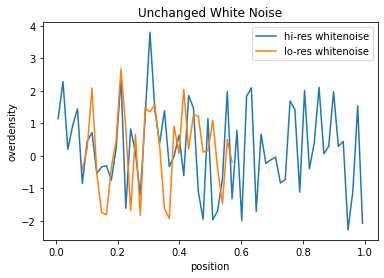

In [4]:
noiseP, noiseW = test._get_whitenoise()
# The noise is in Fourier space, transfer to real space
posnoiseP = noiseP.in_real_space()
posnoiseW = noiseW.in_real_space()
plt.plot(pos[0], posnoiseP, label='hi-res whitenoise')
plt.plot(pos[1], posnoiseW, label='lo-res whitenoise')
plt.legend()
plt.xlabel("position")
plt.ylabel("overdensity")
plt.title("Unchanged White Noise in Position Space")

Text(0.5, 1.0, 'Unchanged White Noise in Fourier Space')

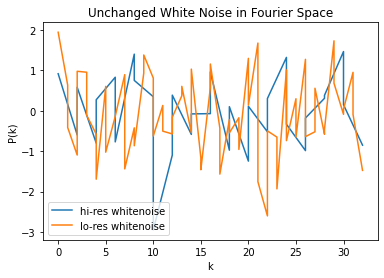

In [7]:
ks = test._get_ks()
plt.plot(ks[0], noiseW, label='hi-res whitenoise')
plt.plot(ks[1], noiseP, label='lo-res whitenoise')
plt.legend()
plt.xlabel("k")
plt.ylabel("P(k)")
plt.title("Unchanged White Noise in Fourier Space")

In [ ]:
import constrainedzoom.plots as czp
czp.plot_power_spectrum

Text(0.5, 1.0, 'Post-Matter Transfer Function White Noise')

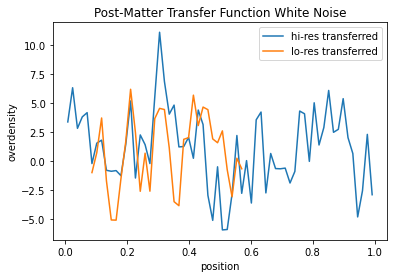

In [5]:
# this gets put into a matter transfer function...
deltaP, deltaW = test._apply_transfer_function(noiseP, noiseW)
delnoiseP = deltaP.in_real_space()
delnoiseW = deltaW.in_real_space()
plt.plot(pos[0], delnoiseP, label='hi-res transferred')
plt.plot(pos[1], delnoiseW, label='lo-res transferred')
plt.legend()
plt.xlabel("position")
plt.ylabel("overdensity")
plt.title("Post-Matter Transfer Function White Noise")